# Assignment 4



In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Load Dataset

In [58]:
data = pd.read_csv(r"/content/Mall_Customers.csv")

In [59]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Performing Visualizations


- Univariate Analysis

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <a list of 10 Patch objects>)

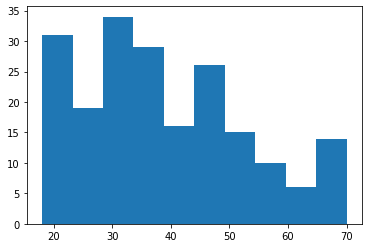

In [60]:
plt.hist(data['Age'])

- Bivariate analysis

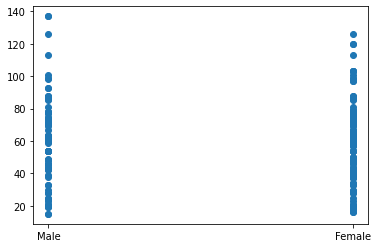

In [61]:
plt.scatter(data['Gender'],data['Annual Income (k$)'])

- Multivariate analysis

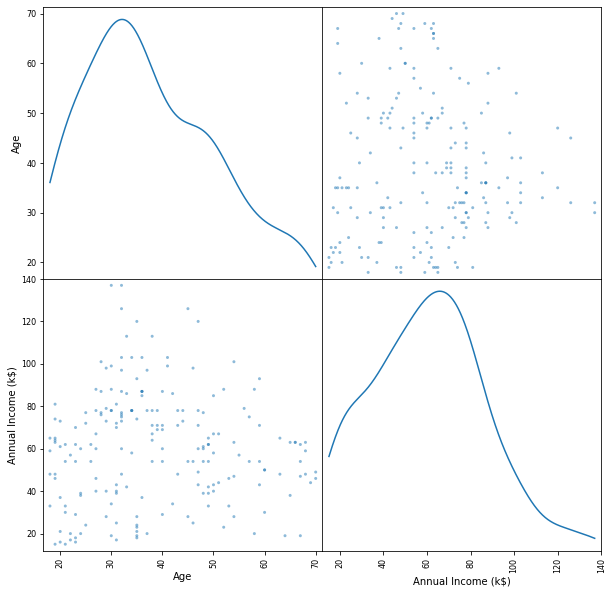

In [62]:
pd.plotting.scatter_matrix(data.loc[:,"Age":"Annual Income (k$)" ], diagonal="kde",figsize=(10,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


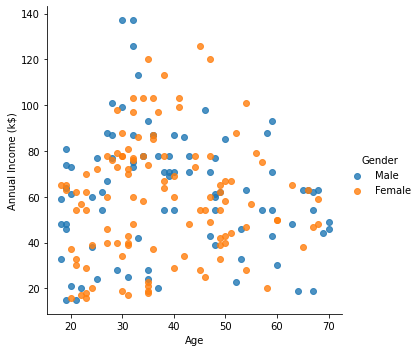

In [63]:
sns.lmplot( "Age","Annual Income (k$)", data, hue="Gender", fit_reg=False);

## 4. Perform descriptive statistics on the dataset.

In [64]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [65]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## 5. Handle the Missing values

In [66]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 6. Find the outliers and replace the outliers

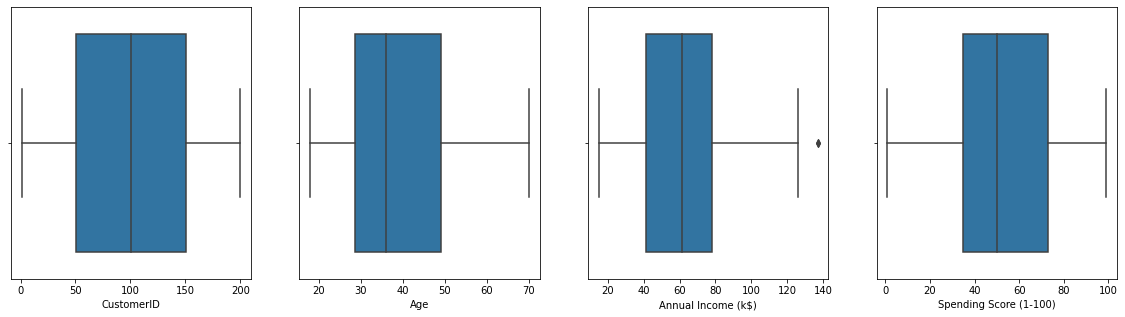

In [67]:
fig,ax=plt.subplots(figsize=(25,5))

plt.subplot(1, 5, 2)
sns.boxplot(x=data['Age'])

plt.subplot(1, 5, 3)
sns.boxplot(x=data['Annual Income (k$)'])

plt.subplot(1, 5, 4)
sns.boxplot(x=data['Spending Score (1-100)'])

plt.subplot(1, 5, 1)
sns.boxplot(x=data['CustomerID'])



### Handling outlier

In [68]:
quant=data.quantile(q=[0.25,0.75])

quant

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [69]:
quant.loc[0.75]

CustomerID                150.25
Age                        49.00
Annual Income (k$)         78.00
Spending Score (1-100)     73.00
Name: 0.75, dtype: float64

In [70]:
quant.loc[0.25]

CustomerID                50.75
Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64

In [71]:
iqr=quant.loc[0.75]-quant.loc[0.25] 
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [72]:
low=quant.loc[0.25]-(1.5*iqr)
low

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [73]:
up=quant.loc[0.75]+(1.5*iqr)
up

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [74]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [75]:
data['Annual Income (k$)']=np.where(data['Annual Income (k$)']>132,60,data['Annual Income (k$)'])

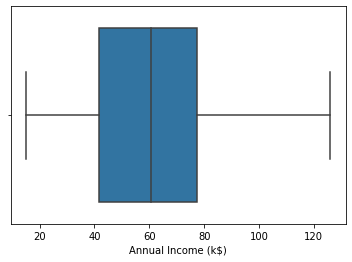

In [76]:
sns.boxplot(x=data['Annual Income (k$)'])

In [77]:
data['Annual Income (k$)']=np.where(data['Annual Income (k$)']<-13,60,data['Annual Income (k$)'])

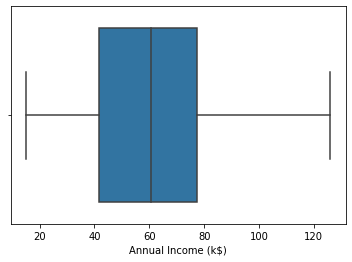

In [78]:
sns.boxplot(x=data['Annual Income (k$)'])

## 7. Check for Categorical columns and perform encoding

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [80]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [81]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [82]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,60,18


## 8. Scaling the data

In [83]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [84]:
df=sc.fit_transform(data.iloc[:,1:])

In [98]:
df

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.        , 0.25      , 0.01801802, 0.39795918],
       [0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.        , 0.09615385, 0.02702703, 0.94897959],
       [1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.        , 0.32692308, 0.03603604, 1.        ],
       [0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [1.        , 0.36538462, 0.04504505, 0.12244898],
       [1.        , 0.07692308, 0.04504505, 0.79591837],
       [0.        , 0.32692308, 0.05405405, 0.34693878],
       [1.        , 0.03846154,

## 9. Perform any of the clustering algorithms

Kmeans_clustering

In [99]:
from sklearn.cluster import KMeans

In [87]:
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)

In [88]:
TWSS

[381550.684068407,
 268120.0915113872,
 191612.56821803434,
 153584.5918448837,
 119223.63779954851,
 101331.22899713693,
 85819.89345888031]

Text(0, 0.5, 'TWSS')

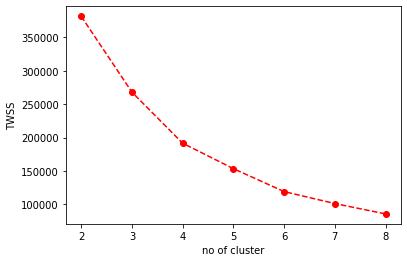

In [100]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [101]:
#selecting 4 clusters 

model=KMeans(n_clusters=4)

model.fit(data)

KMeans(n_clusters=4)

In [102]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [103]:
mb=pd.Series(model.labels_)

In [104]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


## 10. Add the cluster data with the primary dataset

In [106]:
data['clust']=mb

In [107]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [108]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clust
195,196,0,35,120,79,3
196,197,0,45,126,28,1
197,198,1,32,126,74,3
198,199,1,32,60,18,1
199,200,1,30,60,83,3


## 11. Split the data into dependent and independent variables.

In [110]:
#dependent
y=data['clust']
y

0      0
1      0
2      0
3      0
4      0
      ..
195    3
196    1
197    3
198    1
199    3
Name: clust, Length: 200, dtype: int32

In [112]:
#independent
x=data.drop(columns=['CustomerID','clust'],axis=1)
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [124]:
x=scale(x)
x

array([[ 1.12815215, -1.42456879, -1.7882186 , -0.43480148],
       [ 1.12815215, -1.28103541, -1.7882186 ,  1.19570407],
       [-0.88640526, -1.3528021 , -1.74829409, -1.71591298],
       [-0.88640526, -1.13750203, -1.74829409,  1.04041783],
       [-0.88640526, -0.56336851, -1.70836959, -0.39597992],
       [-0.88640526, -1.20926872, -1.70836959,  1.00159627],
       [-0.88640526, -0.27630176, -1.66844508, -1.71591298],
       [-0.88640526, -1.13750203, -1.66844508,  1.70038436],
       [ 1.12815215,  1.80493225, -1.62852058, -1.83237767],
       [-0.88640526, -0.6351352 , -1.62852058,  0.84631002],
       [ 1.12815215,  2.02023231, -1.62852058, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.62852058,  1.89449216],
       [-0.88640526,  1.37433211, -1.58859607, -1.36651894],
       [-0.88640526, -1.06573534, -1.58859607,  1.04041783],
       [ 1.12815215, -0.13276838, -1.58859607, -1.44416206],
       [ 1.12815215, -1.20926872, -1.58859607,  1.11806095],
       [-0.88640526, -0.

## 12. Split the data into training and testing

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## 13. Build the Model

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rf=RandomForestClassifier()

## 14. Train the Model

In [129]:
rf.fit(x_train,y_train)

RandomForestClassifier()

## 15. Test the Model

In [130]:
#prediction
pred=rf.predict(x_test)

## 16. Measure the performance using Evaluation Metrics.

In [131]:
## Accuracy of DT model 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)

0.975

In [132]:
#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[12,  0,  1,  0],
       [ 0,  8,  0,  0],
       [ 0,  0,  9,  0],
       [ 0,  0,  0, 10]])